<a href="https://colab.research.google.com/github/msa-1988/MNIST_Data_Classification/blob/main/MNIST_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**State of the Art for MNIST Data Classification**
MNIST is a popular benchmark dataset for handwritten digit recognition. Over the years, various machine learning and deep learning techniques have been applied to achieve state-of-the-art performance on this dataset. In this project, we will explore the performance of two neural network models, Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN), for classifying the MNIST digits.

**Artificial Neural Networks (ANN)**
ANN is a type of feedforward neural network, commonly used for pattern recognition and classification tasks. In the context of MNIST classification, an ANN can be designed with one or more hidden layers, each comprising multiple neurons. These hidden layers learn non-linear representations of the input data, enabling the network to capture complex patterns and make accurate predictions.

We will implement an ANN using the PyTorch framework. The ANN model will consist of fully connected layers, where each neuron is connected to every neuron in the previous and subsequent layers. By training the ANN on the MNIST dataset, we aim to achieve a high accuracy level in recognizing handwritten digits.

**Convolutional Neural Networks (CNN)**
CNNs have revolutionized image classification tasks, including MNIST digit recognition. Unlike ANNs, CNNs leverage the concept of local receptive fields, shared weights, and spatial hierarchies to efficiently extract features from images. These features are learned by applying convolutional and pooling layers, which enable the network to detect edges, shapes, and other relevant patterns in the input images.

We will also implement a CNN using PyTorch for the MNIST classification task. The CNN model will consist of convolutional layers, followed by pooling layers, and fully connected layers at the end. This architecture allows the CNN to automatically learn and capture intricate spatial features present in the MNIST images, leading to improved accuracy in digit classification.

By comparing the accuracy of both the ANN and CNN models on the MNIST dataset, we can gain insights into the performance differences between these two neural network architectures. This analysis will provide valuable information on which model performs better for handwritten digit recognition, thereby contributing to the understanding of deep learning techniques in image classification tasks.

Feel free to modify and expand upon this draft to suit your needs.

# Importing the necessary libraries:

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Check for GPU

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Loading and preprocessing the MNIST dataset:

In [4]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),                      # Convert image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the image
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 209450482.09it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 121622182.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 188644374.04it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20934647.00it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Defining the architecture of the neural network:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Fully connected layer 1
        self.fc2 = nn.Linear(128, 64)   # Fully connected layer 2
        # self.fc21 = nn.Linear(64, 32)   # Fully connected layer 2
        self.fc3 = nn.Linear(64, 10)    # Output layer with 10 units (for 10 classes)

    def forward(self, x):
        x = torch.flatten(x, 1)         # Flatten the input tensor
        x = torch.relu(self.fc1(x))     # Apply ReLU activation to the first layer
        x = torch.relu(self.fc2(x))     # Apply ReLU activation to the second layer
        # x = torch.relu(self.fc21(x))     # Apply ReLU activation to the second layer
        x = self.fc3(x)                 # Output layer (no activation function)
        return x


In this example, we define a simple feedforward neural network with four fully connected layers. The first layer takes input of size 784 (representing a flattened image of 28x28 pixels). The hidden layers have 128 and 64 units, and  64 and 32 units respectively. Finally, the output layer has 10 units corresponding to the 10 classes in a classification task.

Creating an instance of the neural network and defining the loss function and optimizer:

In [6]:
net = NeuralNetwork().to(device)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(net.parameters(), lr=0.001)  # Stochastic Gradient Descent optimizer


Training the Artificial neural network ANN:

In [7]:
# Train the CNN
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)  # Move inputs to the GPU
        labels = labels.to(device)  # Move labels to the GPU

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch: {epoch+1}, Batch: {i+1}, Loss: {running_loss/100:.3f}')
            running_loss = 0.0

Epoch: 1, Batch: 100, Loss: 2.285
Epoch: 1, Batch: 200, Loss: 2.258
Epoch: 1, Batch: 300, Loss: 2.228
Epoch: 1, Batch: 400, Loss: 2.194
Epoch: 1, Batch: 500, Loss: 2.159
Epoch: 1, Batch: 600, Loss: 2.118
Epoch: 1, Batch: 700, Loss: 2.074
Epoch: 1, Batch: 800, Loss: 2.025
Epoch: 1, Batch: 900, Loss: 1.968
Epoch: 2, Batch: 100, Loss: 1.879
Epoch: 2, Batch: 200, Loss: 1.807
Epoch: 2, Batch: 300, Loss: 1.717
Epoch: 2, Batch: 400, Loss: 1.637
Epoch: 2, Batch: 500, Loss: 1.559
Epoch: 2, Batch: 600, Loss: 1.478
Epoch: 2, Batch: 700, Loss: 1.370
Epoch: 2, Batch: 800, Loss: 1.292
Epoch: 2, Batch: 900, Loss: 1.209
Epoch: 3, Batch: 100, Loss: 1.120
Epoch: 3, Batch: 200, Loss: 1.045
Epoch: 3, Batch: 300, Loss: 0.980
Epoch: 3, Batch: 400, Loss: 0.946
Epoch: 3, Batch: 500, Loss: 0.885
Epoch: 3, Batch: 600, Loss: 0.844
Epoch: 3, Batch: 700, Loss: 0.835
Epoch: 3, Batch: 800, Loss: 0.782
Epoch: 3, Batch: 900, Loss: 0.757
Epoch: 4, Batch: 100, Loss: 0.706
Epoch: 4, Batch: 200, Loss: 0.688
Epoch: 4, Batc

Evaluate the ANN

In [10]:
# Evaluate the CNN on the test data
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)  # Move inputs to the GPU
        labels = labels.to(device)  # Move labels to the GPU

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

# Compute precision, recall, and f1-score
report = classification_report(labels.cpu(), predicted.cpu())

# Print the report
print(report)


Test Accuracy: 90.56%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.93        16
weighted avg       0.97      0.94      0.94        16



Plot some prediction results

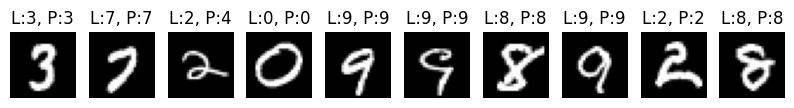

Predictions: [3, 7, 4, 0, 9, 9, 8, 9, 2, 8]


In [11]:


# Function to plot images
def plot_images(images, labels, predictions):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
        ax.set_title(f'L:{labels[i]}, P:{predictions[i]}')
        ax.axis('off')
    plt.show()

# Get some random test images and labels
num_images_to_plot = 10
random_indices = torch.randperm(len(test_dataset))[:num_images_to_plot]
images = torch.stack([test_dataset[i][0] for i in random_indices])
images = images.to(device)
labels = torch.tensor([test_dataset[i][1] for i in random_indices])
labels = labels.to(device)

# Make predictions on the test images
with torch.no_grad():
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)

# Move images, labels, and predictions to the CPU
images = images.cpu()
labels = labels.cpu()
predicted = predicted.cpu()

# Convert tensor labels and predictions to lists
labels = labels.tolist()
predicted = predicted.tolist()

# Plot the test images with labels and predictions
plot_images(images, labels, predicted)

# Print the predictions
print('Predictions:', predicted)


Second NN: We will use a convolutional neural network to check how it performs.
Defining the architecture of CNN

In [12]:
class ConvNet(nn.Module):
    def __init__(self,in_channels = 1,num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels= 8, kernel_size=(3,3),stride=(1,1),padding=(1,1))  # 1 input channel, 32 output channels, 3x3 kernel
        self.pool = nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=8,out_channels= 16, kernel_size=(3,3),stride=(1,1),padding=(1,1))  # 1 input channel, 32 output channels, 3x3 kernel
        self.fc1 = nn.Linear(16*7*7, num_classes)                 # Output layer with 10 units (for 10 classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x=self.pool(x)
        x = torch.relu(self.conv2(x))
        x=self.pool(x)
        x = x.reshape(x.shape[0], -1)  # Flatten the input tensor
        x = self.fc1(x)
        return x


Create an instance of CNN, define the loss function, and optimiser

In [13]:
# Create an instance of the CNN and move it to the GPU
cnn = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(),lr=0.001)

In [14]:
# Train the CNN
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)  # Move inputs to the GPU
        labels = labels.to(device)  # Move labels to the GPU
        # print(inputs.shape)
        # input("presse")

        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch: {epoch+1}, Batch: {i+1}, Loss: {running_loss/100:.3f}')
            running_loss = 0.0

Epoch: 1, Batch: 100, Loss: 0.911
Epoch: 1, Batch: 200, Loss: 0.322
Epoch: 1, Batch: 300, Loss: 0.226
Epoch: 1, Batch: 400, Loss: 0.155
Epoch: 1, Batch: 500, Loss: 0.157
Epoch: 1, Batch: 600, Loss: 0.119
Epoch: 1, Batch: 700, Loss: 0.118
Epoch: 1, Batch: 800, Loss: 0.112
Epoch: 1, Batch: 900, Loss: 0.096
Epoch: 2, Batch: 100, Loss: 0.080
Epoch: 2, Batch: 200, Loss: 0.093
Epoch: 2, Batch: 300, Loss: 0.077
Epoch: 2, Batch: 400, Loss: 0.087
Epoch: 2, Batch: 500, Loss: 0.074
Epoch: 2, Batch: 600, Loss: 0.073
Epoch: 2, Batch: 700, Loss: 0.072
Epoch: 2, Batch: 800, Loss: 0.072
Epoch: 2, Batch: 900, Loss: 0.068
Epoch: 3, Batch: 100, Loss: 0.059
Epoch: 3, Batch: 200, Loss: 0.052
Epoch: 3, Batch: 300, Loss: 0.058
Epoch: 3, Batch: 400, Loss: 0.060
Epoch: 3, Batch: 500, Loss: 0.056
Epoch: 3, Batch: 600, Loss: 0.065
Epoch: 3, Batch: 700, Loss: 0.063
Epoch: 3, Batch: 800, Loss: 0.052
Epoch: 3, Batch: 900, Loss: 0.057
Epoch: 4, Batch: 100, Loss: 0.051
Epoch: 4, Batch: 200, Loss: 0.054
Epoch: 4, Batc

Evaluating the neural network on test data:

In [15]:
# Evaluate the CNN on the test data
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)  # Move inputs to the GPU
        labels = labels.to(device)  # Move labels to the GPU

        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

# Compute precision, recall, and f1-score
report = classification_report(labels.cpu(), predicted.cpu())

# Print the report
print(report)


Test Accuracy: 98.74%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



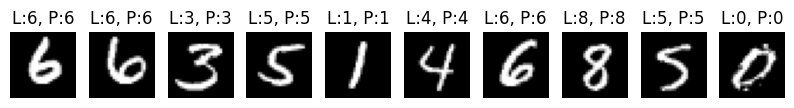

Predictions: [6, 6, 3, 5, 1, 4, 6, 8, 5, 0]


In [16]:


# # Function to plot images
# def plot_images(images, labels, predictions):
#     fig, axes = plt.subplots(1, len(images), figsize=(10, 3))
#     for i, ax in enumerate(axes):
#         ax.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
#         ax.set_title(f'Lbl:{labels[i]}, Prd:{predictions[i]}')
#         ax.axis('off')
#     plt.show()

# Get some random test images and labels
num_images_to_plot = 10
random_indices = torch.randperm(len(test_dataset))[:num_images_to_plot]
images = torch.stack([test_dataset[i][0] for i in random_indices])
images = images.to(device)
labels = torch.tensor([test_dataset[i][1] for i in random_indices])
labels = labels.to(device)

# Make predictions on the test images
with torch.no_grad():
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)

# Move images, labels, and predictions to the CPU
images = images.cpu()
labels = labels.cpu()
predicted = predicted.cpu()

# Convert tensor labels and predictions to lists
labels = labels.tolist()
predicted = predicted.tolist()

# Plot the test images with labels and predictions
plot_images(images, labels, predicted)

# Print the predictions
print('Predictions:', predicted)


This example demonstrates the basic steps involved in implementing an artificial neural network using PyTorch. Remember to preprocess and load your data appropriately, adjust the hyperparameters (e.g., learning rate, number of epochs), and choose an appropriate dataset for your task.